In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
import time
import zipfile

%matplotlib inline

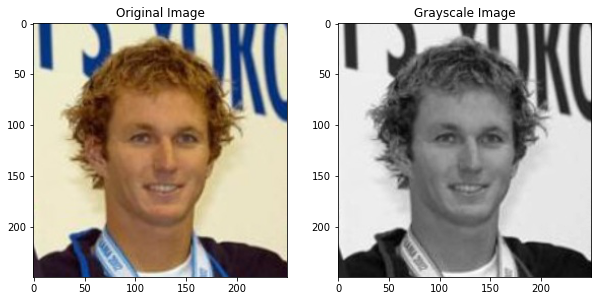

In [2]:
timg_1 = mpimg.imread('/Users/marie/OneDrive/Escritorio/Vision Artificial/Project/Fotos/Aaron_Peirsol_0002.jpg')

timg1_gray = cv2.cvtColor(timg_1, cv2.COLOR_RGB2GRAY)

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
ax1.set_title('Original Image')
ax1.imshow(timg_1)
ax2.set_title('Grayscale Image')
ax2.imshow(timg1_gray, cmap='gray')

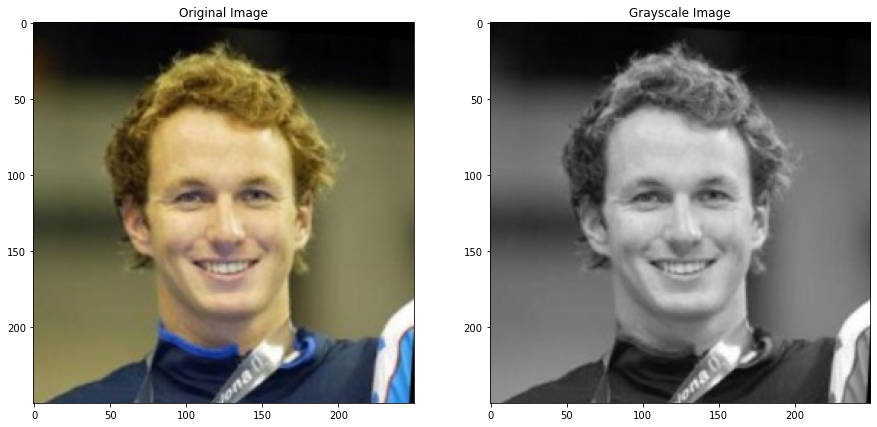

In [3]:
vimage_1 = mpimg.imread('/Users/marie/OneDrive/Escritorio/Vision Artificial/Project/Fotos/Aaron_Peirsol_0003.jpg')
vimg1_gray = cv2.cvtColor(vimage_1, cv2.COLOR_RGB2GRAY)

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.set_title('Original Image')
ax1.imshow(vimage_1)
ax2.set_title('Grayscale Image')
ax2.imshow(vimg1_gray, cmap='gray')

In [4]:
def SIFT (image, retimg, grayconv=True):
# retimg = return image | grayconv = image convert to grayscale
    if grayconv:
        gray = image
    else:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    out = cv2.drawKeypoints(gray,keypoints,gray,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print('Number of Keypoints found: ', len(keypoints))
    if (retimg):
        return keypoints, descriptors, out
    else:
        return keypoints, descriptors

In [5]:
# function to graph color images
def graph(img_col, titles, x, y=1, cmap = 'viridis'):
  """
  Input:
  img_col = array of images, titles = array of titles (same order than images)
  x = # of columns of image matrix, y = # of rows of image matrix (def=1)
  Output:
  None
  Graphs an image matrix with user defined size, the user sends the images on an 
  array, the images on another array, and the size. For a single row use, the 
  user just sends the column number.
  Use of libraries: matplotlib.pyplot as plt
  """
  f1_1, axes = plt.subplots(y,x, figsize=(15,10)) 
  d = 0
  if (y == 1): 
    if (x == 1):
      axes.set_title(titles[0])
      axes.imshow(img_col[0], cmap=cmap)
    else:
      for i in range(x):
        axes[i].set_title(titles[d])
        axes[i].imshow(img_col[d], cmap=cmap)        
        d = d+1
  else: 
    for i in range(x):
      for j in range(y):
        axes[i][j].set_title(titles[d])
        axes[i][j].imshow(img_col[d], cmap=cmap)
        d = d+1

Number of Keypoints found:  286
Number of Keypoints found:  289


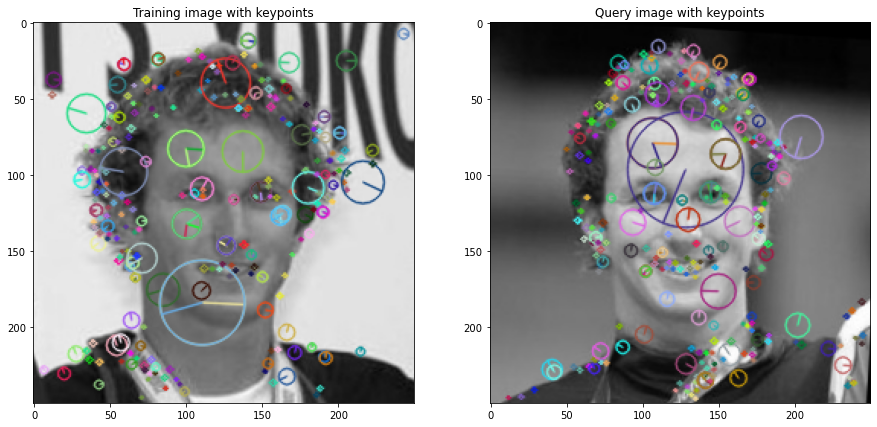

In [6]:
kp1tr,ds1tr,imgtr1 = SIFT(timg_1,True,False)
kp1v,ds1v,imgv1 = SIFT(vimage_1,True,False)
graph([imgtr1, imgv1], ['Training image with keypoints', 'Query image with keypoints'], 2)

In [7]:
bf = cv2.BFMatcher()

matches = bf.knnMatch(ds1tr, ds1v, k=2)
len(matches)

286

In [8]:
gm = []
for m, n in matches:
    if m.distance < 0.88*n.distance:
        gm.append([m])
print(len(matches))
print(len(gm))

286
47


It's a Match


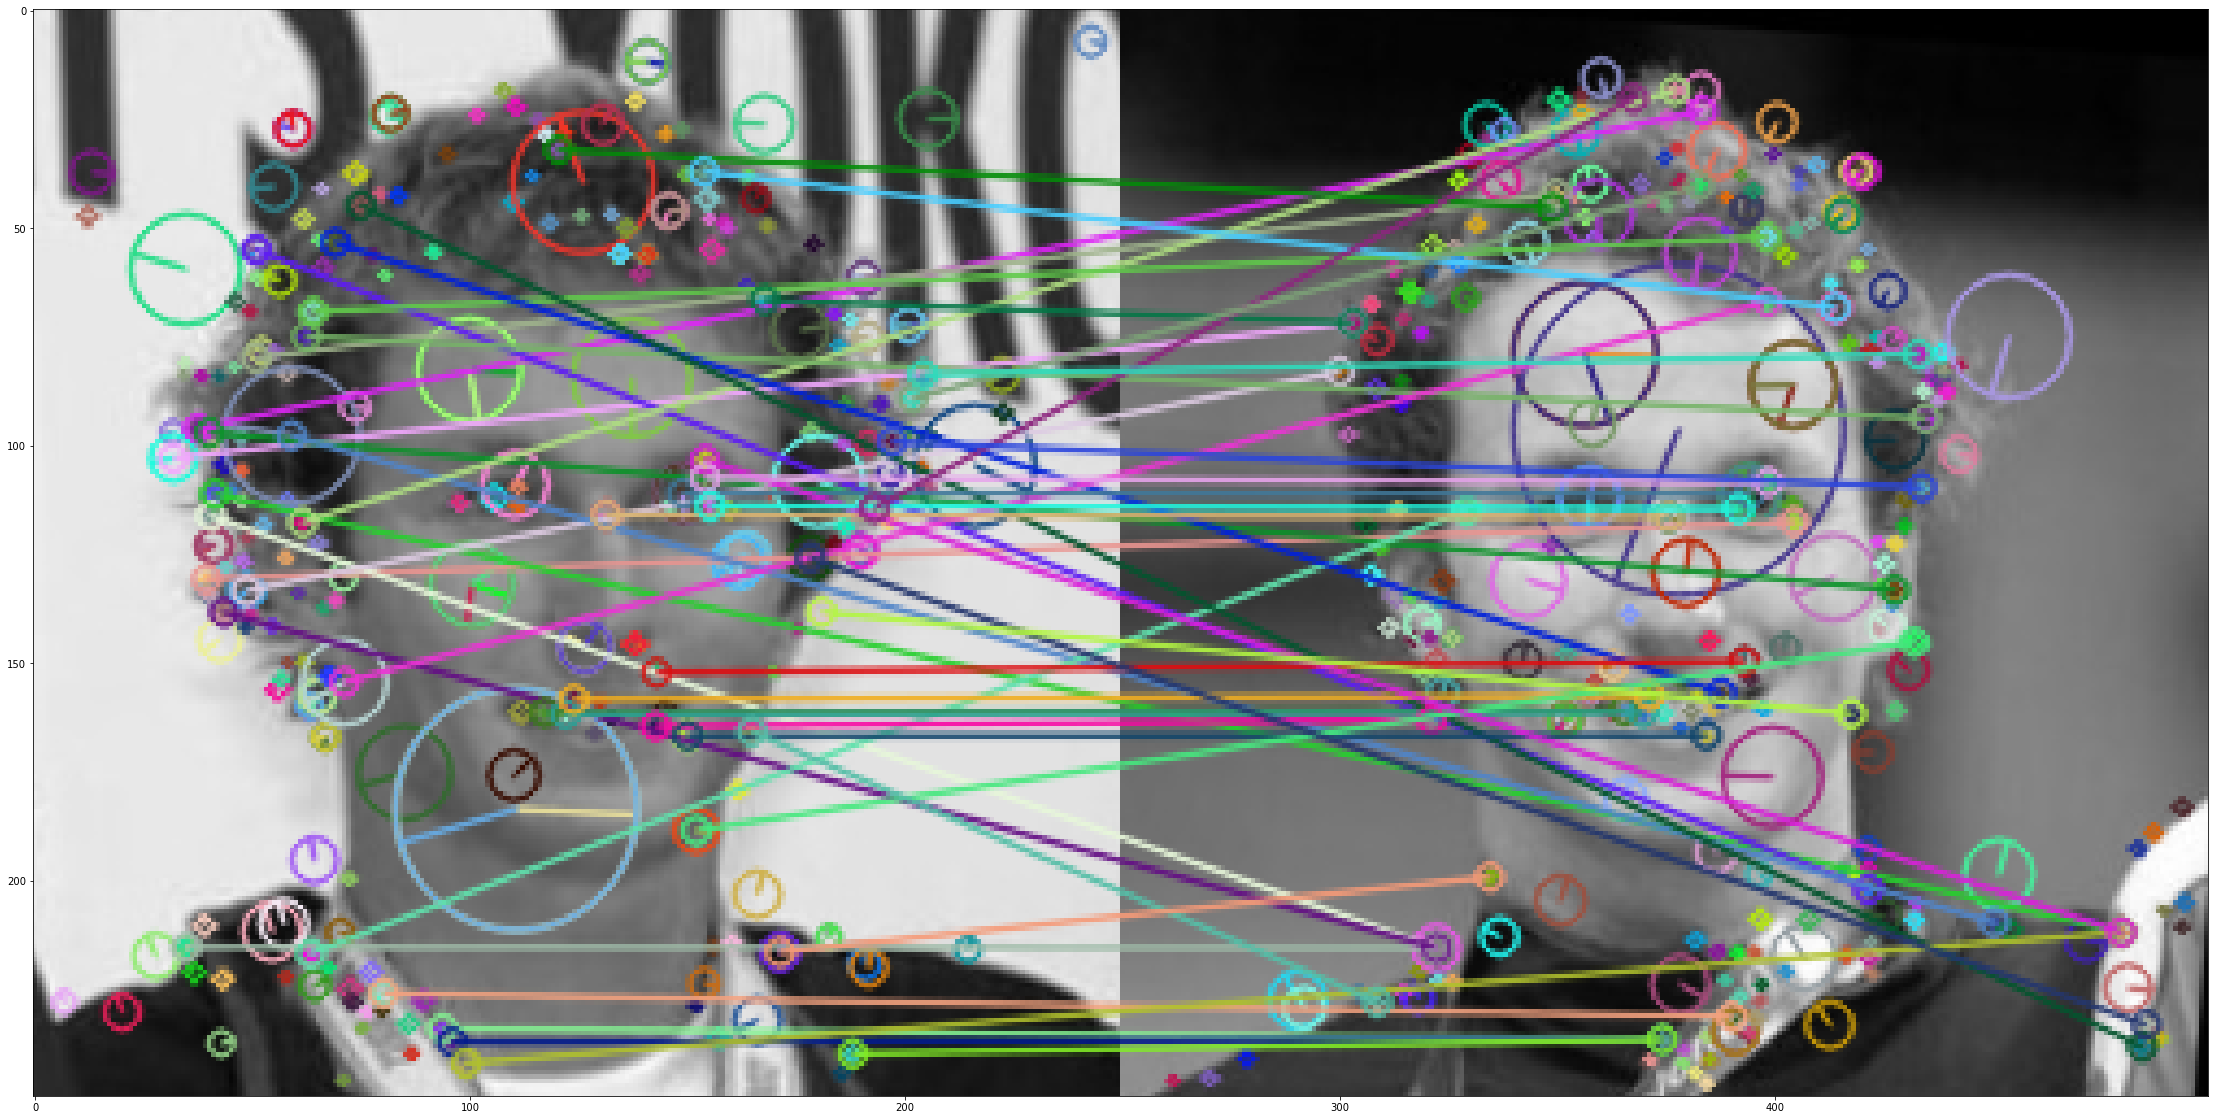

In [9]:
img3 = cv2.drawMatchesKnn(imgtr1,kp1tr,imgv1,kp1v,gm,None,flags=2)

if len(gm)>=45:
  print("It's a Match")

else:
  print("Not a Match")

plt.figure(figsize=(40,20))
plt.imshow(img3)
plt.show()

Number of Keypoints found:  286
Number of Keypoints found:  289
2
286
good matches: 47
It's a Match


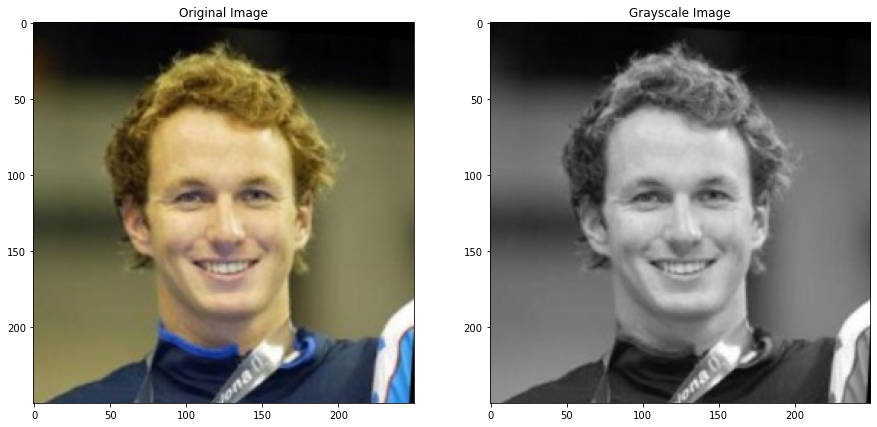

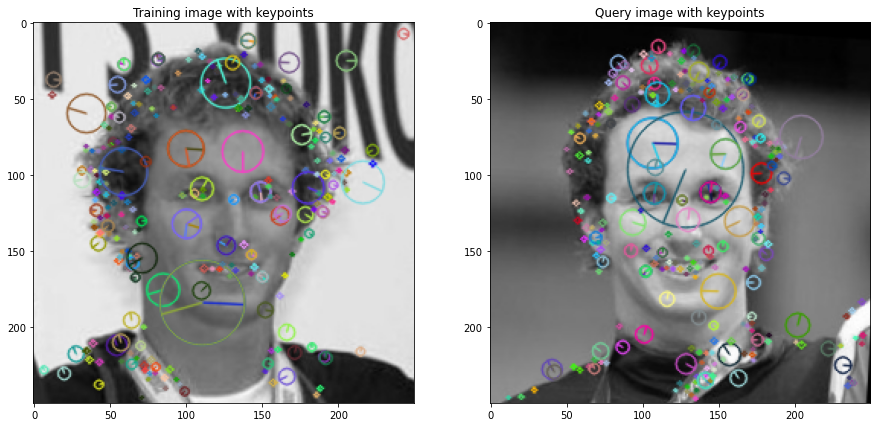

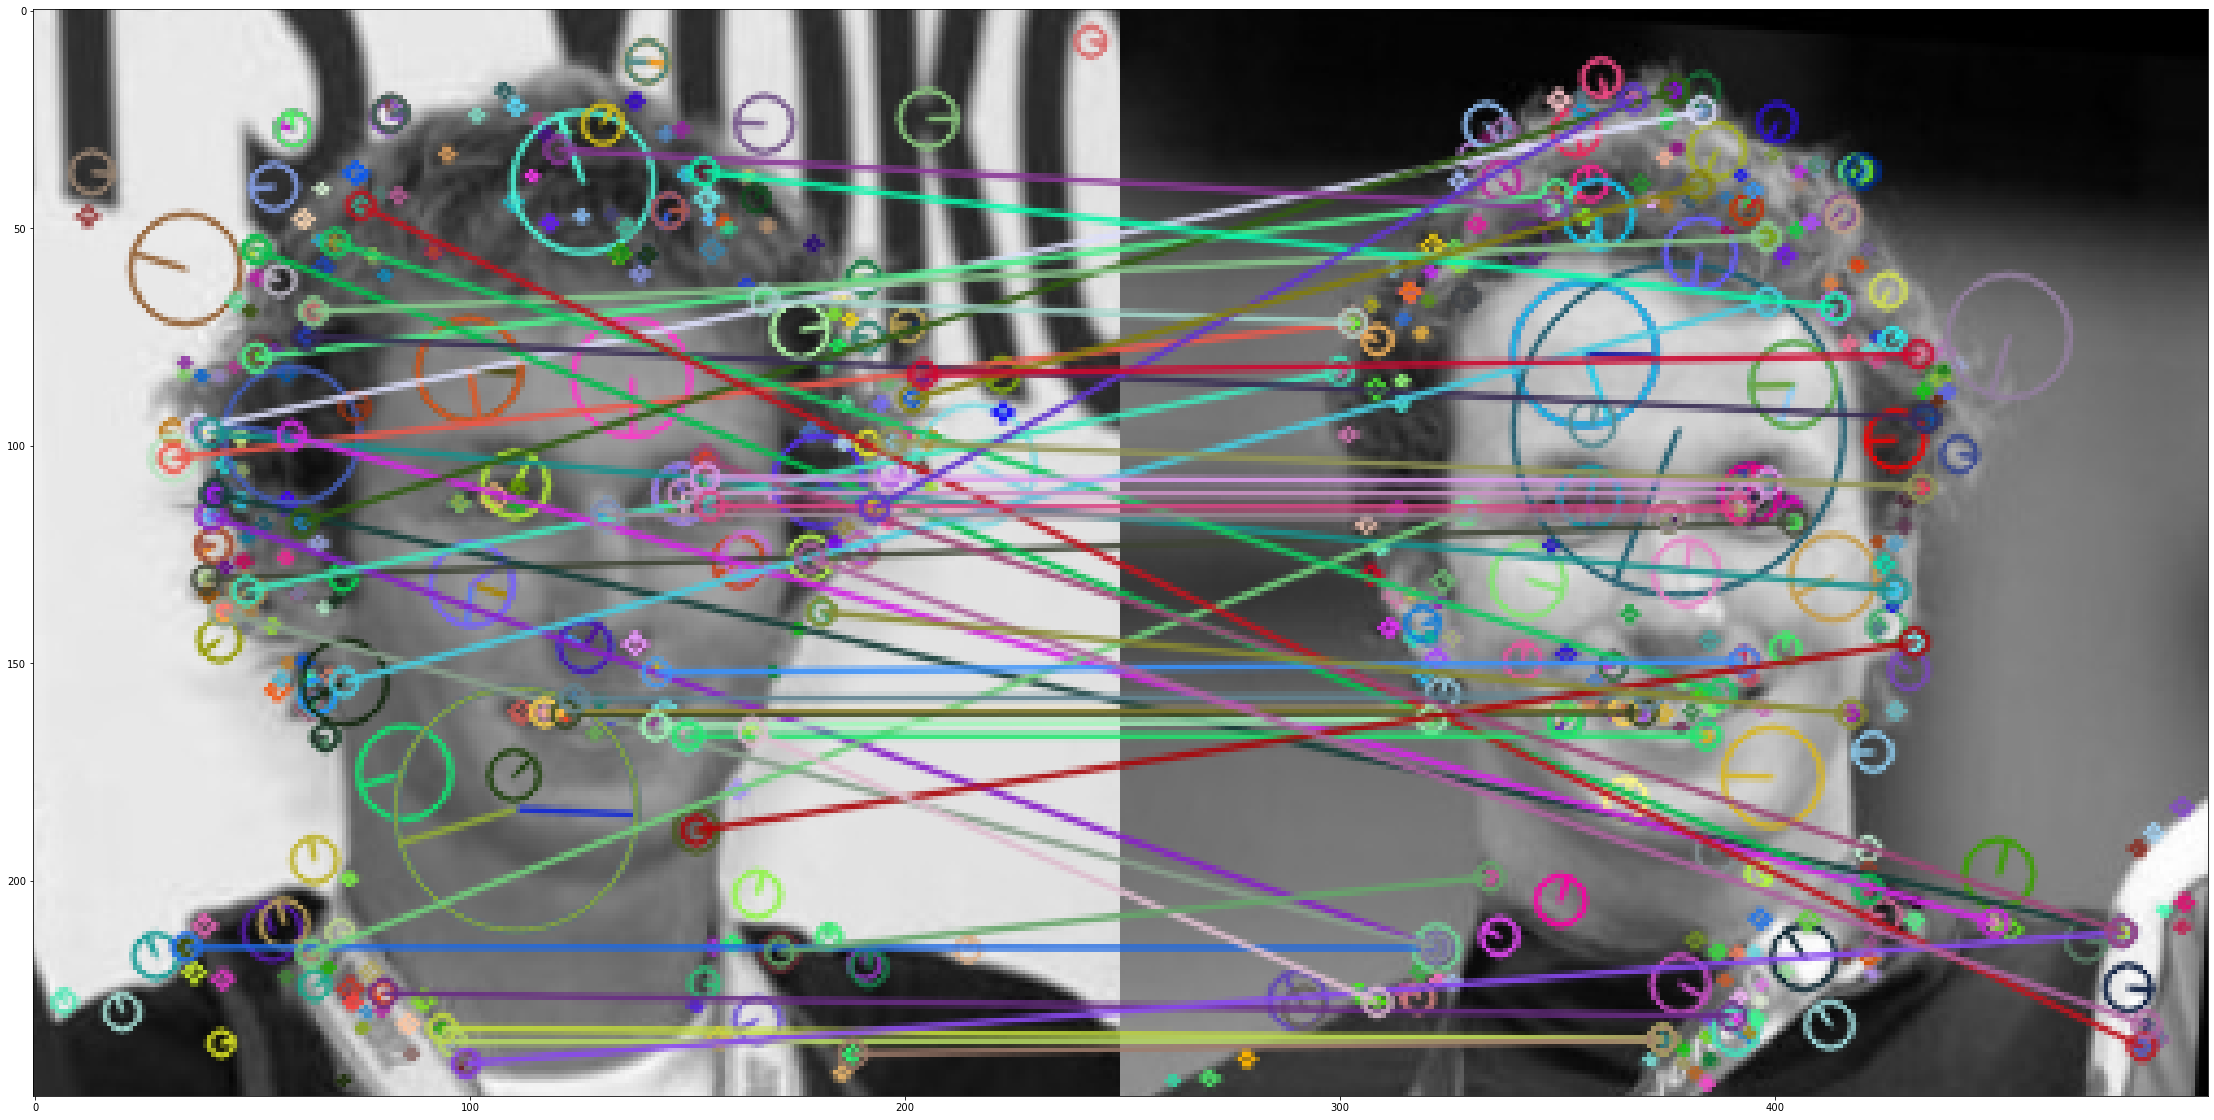

In [11]:
def query(person, thresh=0.88):
    aux = '/Users/marie/OneDrive/Escritorio/Vision Artificial/Project/Fotos/'+person+'.jpg'
    vimg = mpimg.imread(aux)
    vimgray = cv2.cvtColor(vimg, cv2.COLOR_RGB2GRAY)

    f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.set_title('Original Image')
    ax1.imshow(vimage_1)
    ax2.set_title('Grayscale Image')
    ax2.imshow(vimg1_gray, cmap='gray')
    
    kp1tr,ds1tr,imgtr1 = SIFT(timg_1,True,False)
    kp1v,ds1v,imgv1 = SIFT(vimage_1,True,False)
    graph([imgtr1, imgv1], ['Training image with keypoints', 'Query image with keypoints'], 2)
    
    bf = cv2.BFMatcher()

    matches = bf.knnMatch(ds1tr, ds1v, k=2)
    print(len(matches[0]))
    
    gm = [] # good matches
    for m, n in matches:
        if m.distance < thresh*n.distance:
            gm.append([m])
    print(len(matches))
    print('good matches: '+str(len(gm)))
    
    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(imgtr1,kp1tr,imgv1,kp1v,gm,None,flags=2)

    # decide whether the images are a match or not based on the number of good matches.
    # Yes, crude but a good starting intuition
    if len(gm)>=45:
      print("It's a Match")

    else:
      print("Not a Match")

    plt.figure(figsize=(40,20))
    plt.imshow(img3)
    plt.show()
    
query('Aaron_Peirsol_0003')